<a href="https://colab.research.google.com/github/sajeebju/Deep-Learning/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Python/heart_data.csv")
df.head(4)

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647


In [5]:
df = df.drop("Unnamed: 0", axis = 1)
df.head(4)

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647


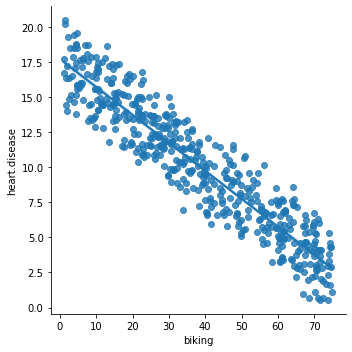

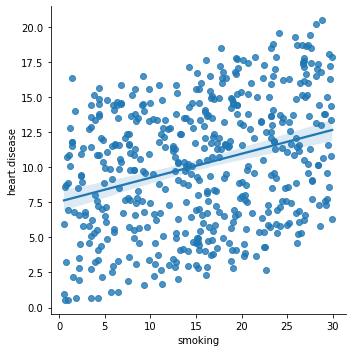

In [6]:
sns.lmplot(x='biking', y='heart.disease', data=df)  
sns.lmplot(x='smoking', y='heart.disease', data=df)

In [7]:
x_df = df.drop("heart.disease", axis = 1)
y_df = df["heart.disease"]


In [8]:
x = x_df.to_numpy()
y = y_df.to_numpy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2, input_dim = 2, activation = "relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
history = model.fit(X_train, y_train ,verbose=1, epochs=1000, 
                    validation_data=(X_test, y_test))

Epoch 1/1000
11/11 [==============================] - 5s 39ms/step - loss: 77.7541 - val_loss: 63.3193
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 76.9221 - val_loss: 62.5322
Epoch 3/1000
11/11 [==============================] - 0s 7ms/step - loss: 76.1100 - val_loss: 61.8165
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 75.3939 - val_loss: 61.1419
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 74.6089 - val_loss: 60.5485
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 73.8980 - val_loss: 59.9493
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 73.1402 - val_loss: 59.3858
Epoch 8/1000
11/11 [==============================] - 0s 5ms/step - loss: 72.4620 - val_loss: 58.7767
Epoch 9/1000
11/11 [==============================] - 0s 6ms/step - loss: 71.6731 - val_loss: 58.2055
Epoch 10/1000
11/11 [==============================] - 0s 7ms/step - loss: 70.904

In [14]:
#Prediction

prediction_test = model.predict(X_test)
print(y_test, prediction_test)

[ 6.75601546  9.46602604 14.08865401 13.37742996 16.38467802 13.37980742
  7.59179728 10.05580546  6.80839968 12.09848437  7.81638864  9.83547443
  4.94609016  9.77538589  7.70739764 17.05893586  4.29637701  7.98222748
  5.52393102  5.92568029  1.10482036  7.61880347 12.37369096 14.17984416
 11.63207228 13.17374097  6.50794745 10.37232868 13.37300547 11.75315615
  8.55785408 12.04664323 12.92167259 17.17780348  3.29621777  6.51670365
  6.7390807   7.59016604 13.28367033 10.86552244  2.70846056  3.40208038
  8.02740434 10.37756908 11.76942278  8.60827208 15.98937136  7.47437198
 17.87769197  3.68936446  0.98753645  5.07228124  6.95950199 15.19818432
  9.74718577  6.71507793  7.93060122 11.29439158 13.01604512  4.07682347
  7.3303757   7.04062107 13.47050633  5.56092164 11.10563057 12.81263706
 16.16479395  5.68568185 17.47394032  9.23007425  4.70700936  3.74449837
 18.68979793 16.19911804  3.10933775  9.51338391 13.28152871  6.73577092
 11.1407355   8.86792508 19.43196008  6.91625864 14

In [15]:
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

Mean sq. errror between y_test and predicted = 0.0018349031337074346


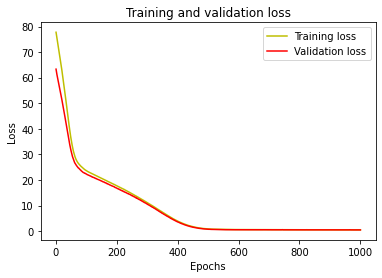

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()